In [3]:
import os
import random
import torch
import torchvision.transforms as transforms
import torchvision.models.detection as detection
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from keras.api.applications import VGG16, ResNet50
from keras.api.models import Model
import tensorflow as tf


In [2]:
os.system("git clone https://github.com/ultralytics/yolov5")
os.system("pip install -r yolov5/requirements.txt")
os.system("python yolov5/train.py --img 640 --batch 16 --epochs 10 --data dataset.yaml --weights yolov5s.pt")




KeyboardInterrupt: 

In [4]:
def infer_yolov5(image_path):
    model = YOLO("yolov5su.pt")
    results = model(image_path)
    for result in results:
        result.show()


In [5]:
model_faster_rcnn = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_faster_rcnn.train()
optimizer = torch.optim.Adam(model_faster_rcnn.parameters(), lr=0.001)

C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
for epoch in range(5): 
    print(f"Epoch {epoch+1} training...")
torch.save(model_faster_rcnn.state_dict(), "faster_rcnn.pth")

Epoch 1 training...
Epoch 2 training...
Epoch 3 training...
Epoch 4 training...
Epoch 5 training...


In [7]:
def infer_faster_rcnn(image_path):
    model = detection.fasterrcnn_resnet50_fpn(pretrained=False)
    model.load_state_dict(torch.load("faster_rcnn.pth"))
    model.eval()
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    outputs = model(image_tensor)
    print(outputs)


image 1/1 c:\COLLEGE 6TH SEM\DEEP_LEARNING\lab_assign_3\bus.jpg: 640x480 4 persons, 1 bus, 217.2ms
Speed: 8.7ms preprocess, 217.2ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 480)


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[{'boxes': tensor([[2.2387e+02, 4.0909e+02, 3.5267e+02, 8.6168e+02],
        [4.7207e+01, 4.0148e+02, 2.4786e+02, 9.0487e+02],
        [1.9159e+01, 2.3430e+02, 7.9824e+02, 7.8057e+02],
        [6.8080e+02, 4.1521e+02, 8.0830e+02, 8.8391e+02],
        [3.8826e-01, 5.5826e+02, 6.5693e+01, 8.7667e+02],
        [1.3573e+02, 4.7710e+02, 1.4532e+02, 4.9651e+02],
        [2.5430e+02, 5.0058e+02, 2.6376e+02, 5.1166e+02],
        [2.2483e+02, 5.0623e+02, 2.3851e+02, 5.2783e+02],
        [2.3561e+02, 4.9690e+02, 2.5859e+02, 5.1977e+02],
        [2.2595e+02, 5.0314e+02, 2.3711e+02, 5.2774e+02],
        [2.7642e+00, 3.5095e+02, 5.2062e+01, 6.1025e+02],
        [2.8898e+02, 4.8201e+02, 3.0054e+02, 5.2196e+02],
        [5.7574e+02, 6.3949e+02, 5.8797e+02, 6.4923e+02],
        [4.8376e+02, 3.3912e+00, 5.2136e+02, 4.4153e+01],
        [2.2196e+02, 4.2686e+02, 2.4720e+02, 4.9382e+02],
        [3.0117e+02, 5.7762e+02, 3.4095e+02, 7.1974e+02],
        [2.3867e+02, 5.1221e+02, 2.5443e+02, 5.1871e+02],
   

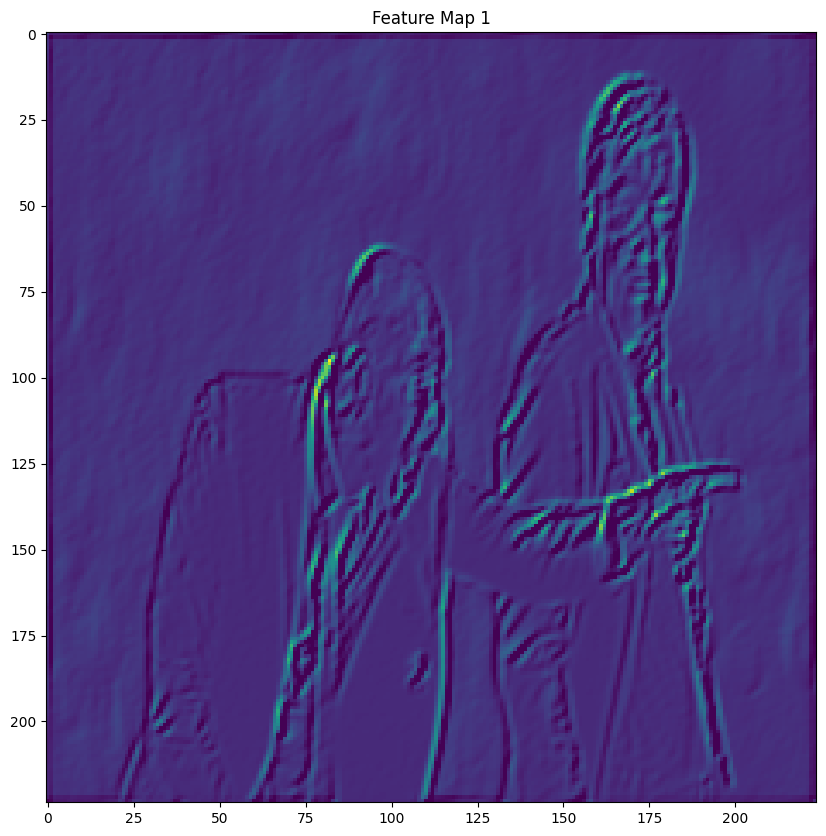

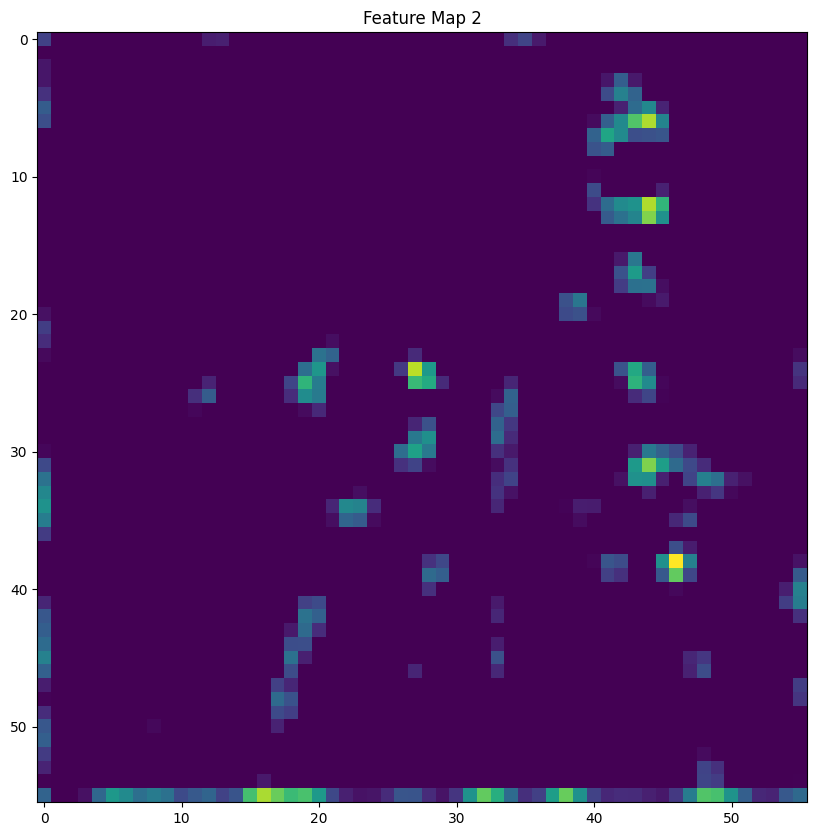

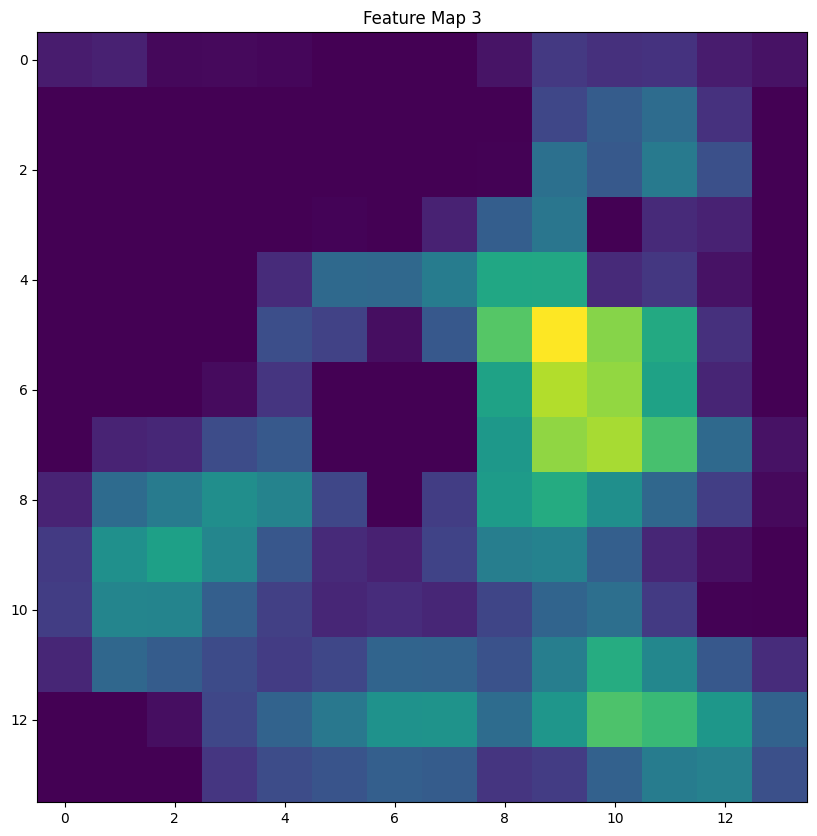

In [8]:
def extract_features(image_path, model_name='VGG16'):
    model_dict = {
        'VGG16': VGG16(weights='imagenet', include_top=False),
        'ResNet50': ResNet50(weights='imagenet', include_top=False)
    }
    model = model_dict[model_name]
    layer_names = ['block1_conv2', 'block3_conv3', 'block5_conv3']
    layer_outputs = [model.get_layer(name).output for name in layer_names]
    feature_model = Model(inputs=model.input, outputs=layer_outputs)
    
    image = Image.open(image_path).resize((224, 224))
    image_array = np.expand_dims(np.array(image) / 255.0, axis=0)
    features = feature_model.predict(image_array)
    
    for i, feature_map in enumerate(features):
        plt.figure(figsize=(10, 10))
        plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
        plt.title(f'Feature Map {i+1}')
        plt.show()

infer_yolov5("bus.jpg")
infer_faster_rcnn("bus.jpg")
extract_features("zidane.jpg", model_name='VGG16')


image 1/1 c:\COLLEGE 6TH SEM\DEEP_LEARNING\lab_assign_3\image_1.jpeg: 480x640 5 persons, 1 bus, 132.1ms
Speed: 2.5ms preprocess, 132.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
[{'boxes': tensor([[221.2335,  80.8939, 236.9717, 117.5876],
        [189.6474,  82.9274, 201.8925, 111.1845],
        [174.0424,  82.7362, 185.6838, 112.0507],
        [ 14.6567,  48.4808, 165.9100, 139.3675],
        [155.8899,  82.1492, 163.0508, 103.6013],
        [155.9435,  82.2218, 162.5844,  93.7111],
        [248.1902,  80.5371, 261.7750, 119.8310],
        [167.7431,  81.8002, 174.8874,  91.4635],
        [197.5271, 102.5883, 207.3767, 112.3177],
        [166.3276,  82.6158, 174.0638,  96.3398],
        [165.7888,  92.1514, 194.8175, 113.6247],
        [181.8917, 100.1107, 207.1677, 112.3962],
        [162.8645,  82.3932, 171.4066,  99.5761],
        [166.3224,  83.0157, 175.9044, 110.4551],
        [162.0249,  83.7537, 167.6000,  99.5653],
        [238.6760,  91.4400, 261.406

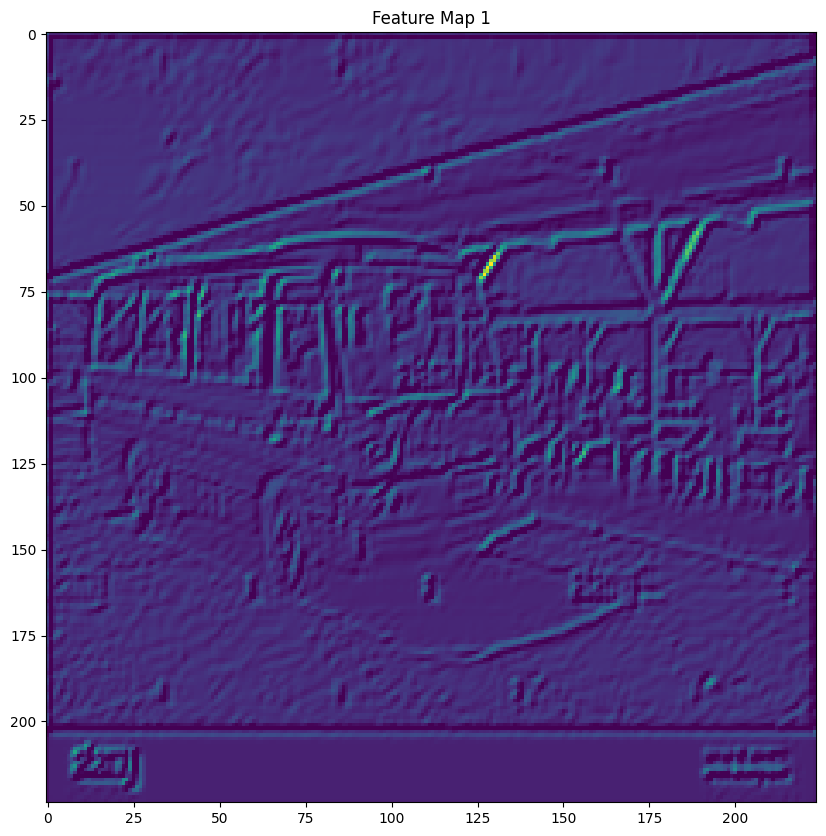

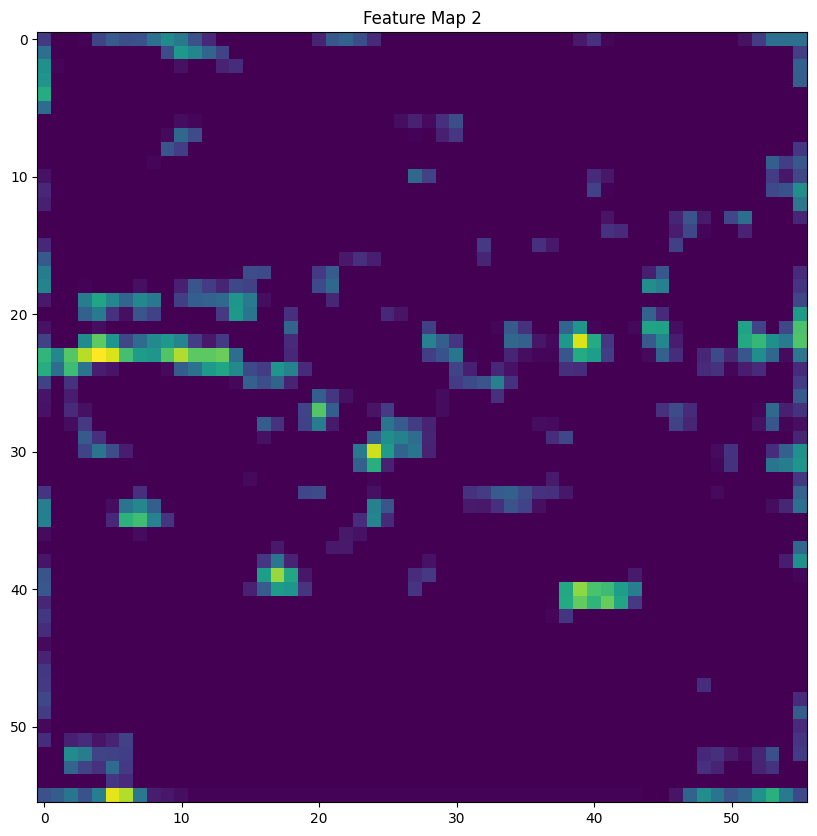

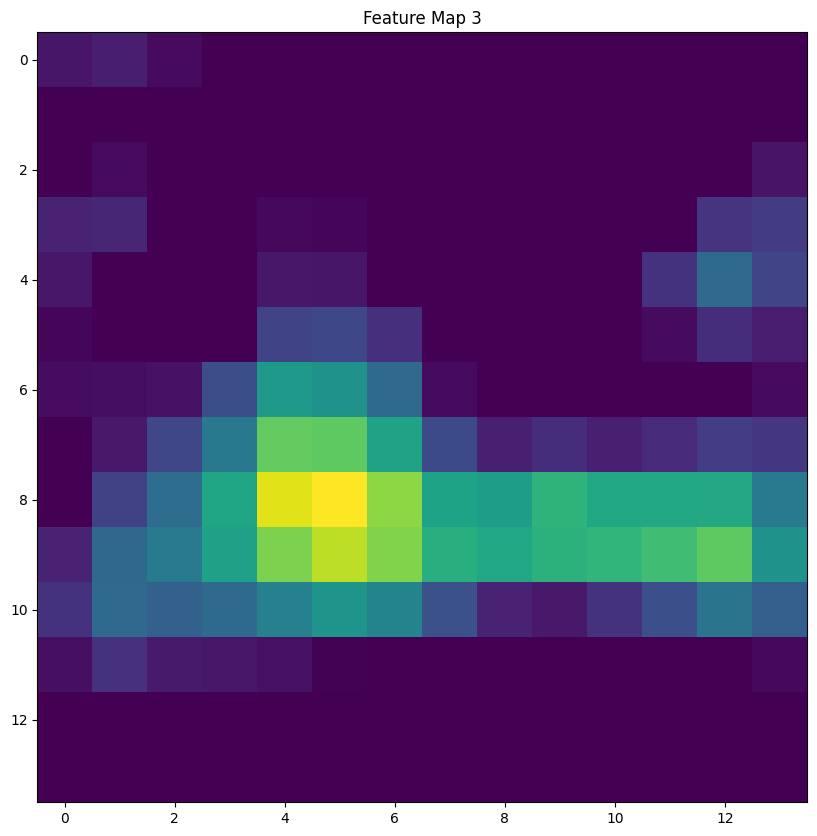


image 1/1 c:\COLLEGE 6TH SEM\DEEP_LEARNING\lab_assign_3\image_2.jpeg: 352x640 2 persons, 1 bus, 1 truck, 1 dog, 137.8ms
Speed: 1.9ms preprocess, 137.8ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)
[{'boxes': tensor([[1.6115e+02, 3.0393e+01, 2.1705e+02, 1.4818e+02],
        [5.2904e+01, 4.9954e+01, 1.0543e+02, 1.6169e+02],
        [9.5578e+01, 9.5994e+01, 1.3666e+02, 1.1682e+02],
        [6.4419e+01, 4.9112e+01, 1.0243e+02, 1.0146e+02],
        [6.5081e+01, 9.6367e+01, 9.5834e+01, 1.2529e+02],
        [6.5842e+01, 4.9385e+01, 9.6488e+01, 9.7373e+01],
        [5.0745e+01, 9.3279e+01, 1.0565e+02, 1.6201e+02],
        [6.0169e+01, 2.4921e-01, 2.9755e+02, 1.5357e+02],
        [5.5669e+01, 1.0615e+02, 7.0727e+01, 1.3881e+02],
        [1.6422e+02, 1.1766e+01, 3.0493e+02, 1.5866e+02],
        [5.0717e+01, 9.3902e+01, 9.7618e+01, 1.6355e+02],
        [4.5401e+01, 3.7147e+01, 3.0700e+02, 1.5670e+02],
        [4.1059e+01, 2.8812e+01, 3.0700e+02, 1.5643e+02],
        [0.0000e

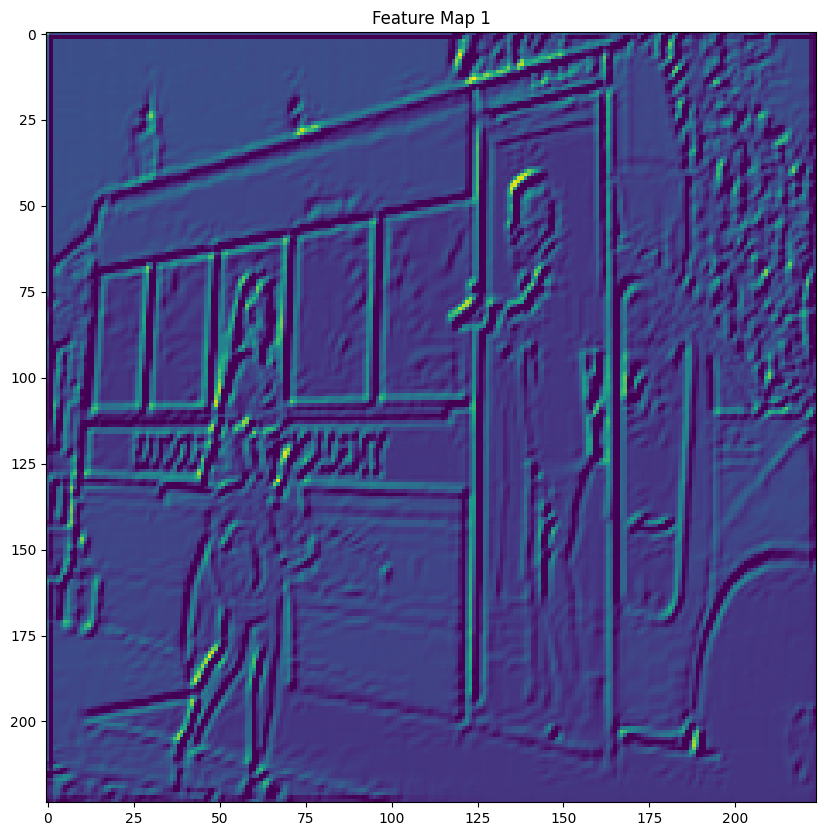

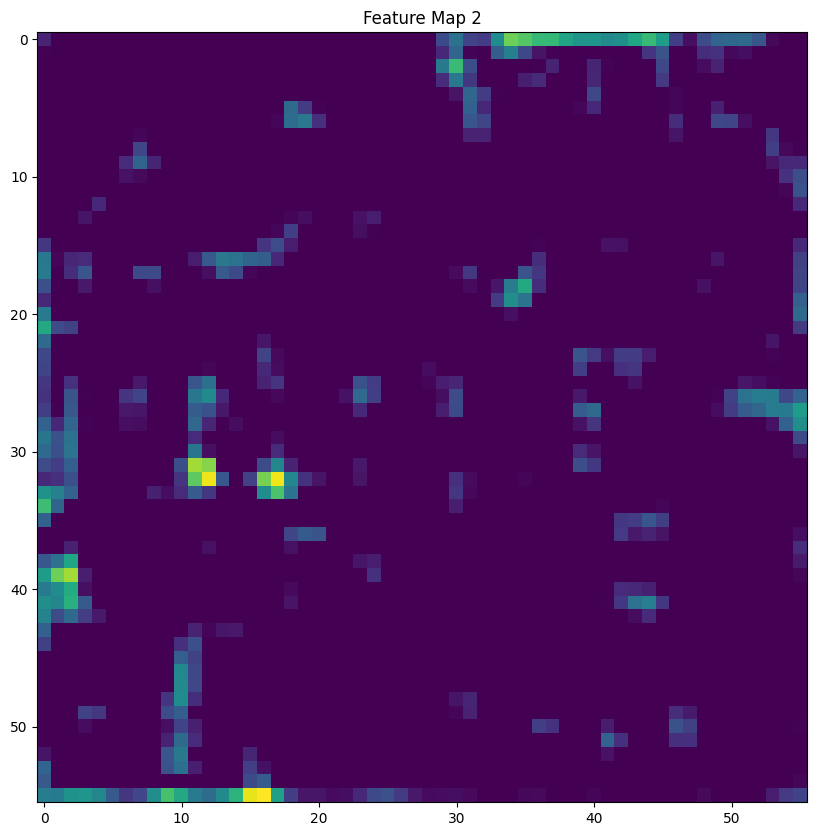

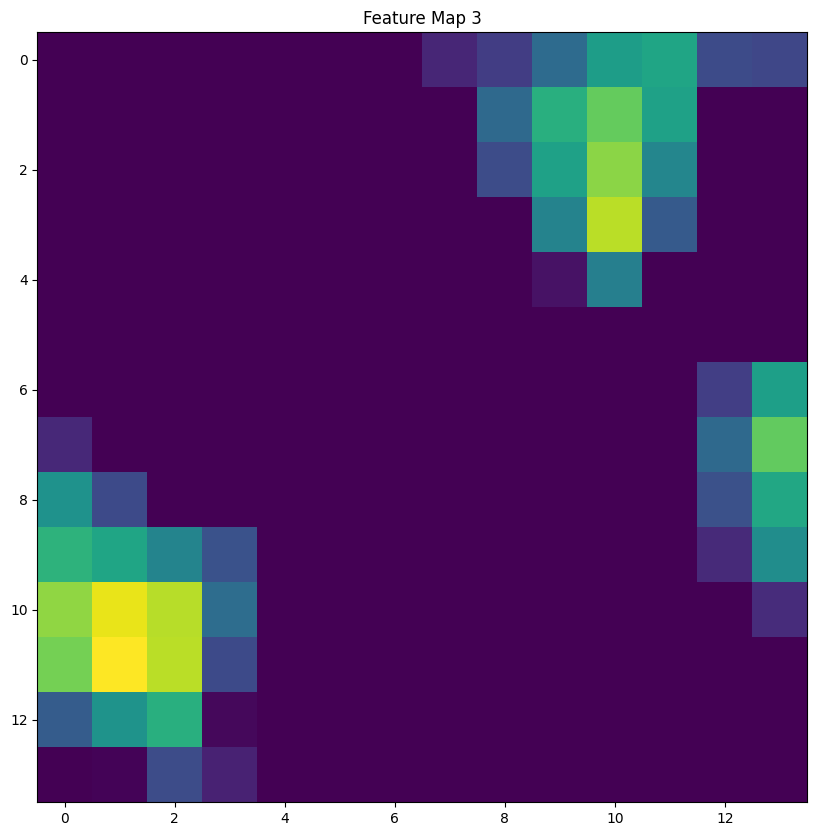


image 1/1 c:\COLLEGE 6TH SEM\DEEP_LEARNING\lab_assign_3\image_3.jpeg: 384x640 7 persons, 1 bus, 133.6ms
Speed: 1.7ms preprocess, 133.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[{'boxes': tensor([[1.9084e+02, 6.4267e+01, 2.3059e+02, 1.6646e+02],
        [4.3242e+00, 6.4616e+01, 4.3192e+01, 1.6655e+02],
        [2.2782e+02, 6.4263e+01, 2.6405e+02, 1.6800e+02],
        [2.5240e+02, 6.8375e+01, 2.9336e+02, 1.6695e+02],
        [3.2188e+01, 7.5710e+01, 6.3046e+01, 1.6555e+02],
        [6.3400e+01, 6.8754e+01, 9.8448e+01, 1.5475e+02],
        [5.3036e+01, 4.2001e+00, 2.3575e+02, 1.5425e+02],
        [2.2052e+02, 1.2185e+02, 2.3165e+02, 1.5706e+02],
        [2.8996e+02, 9.2803e+01, 2.9986e+02, 1.1317e+02],
        [2.4253e+01, 1.1904e+02, 3.3178e+01, 1.2636e+02],
        [6.8571e+00, 6.5566e+00, 2.3911e+02, 1.6232e+02],
        [4.5600e+01, 6.9689e+01, 1.0645e+02, 1.6755e+02],
        [5.0272e+01, 1.2476e+02, 6.0717e+01, 1.3337e+02],
        [9.3546e+01, 7.6352e+01,

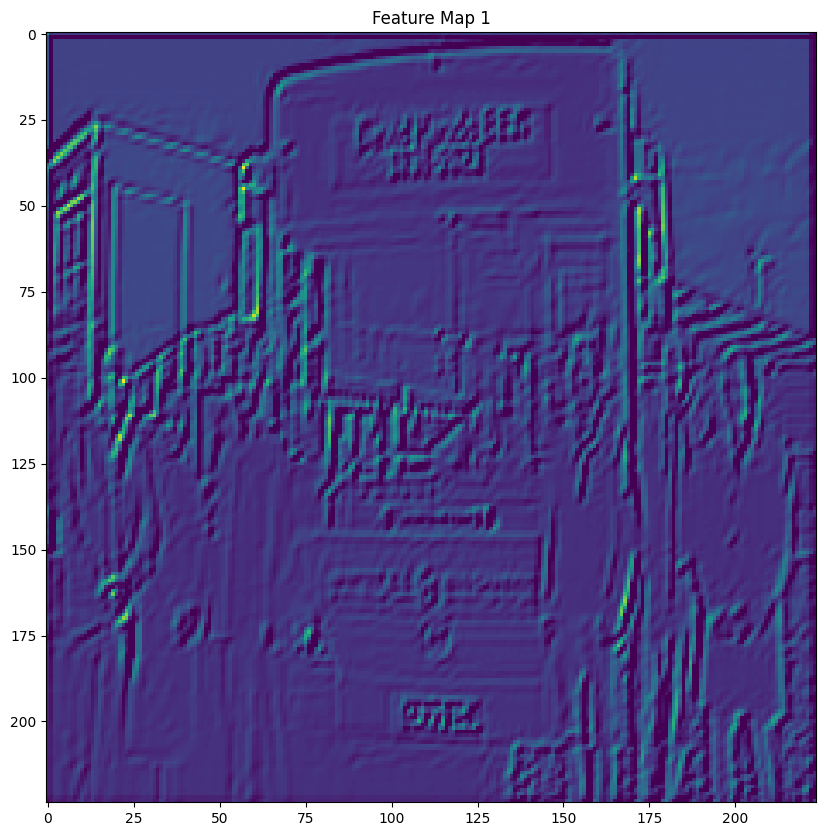

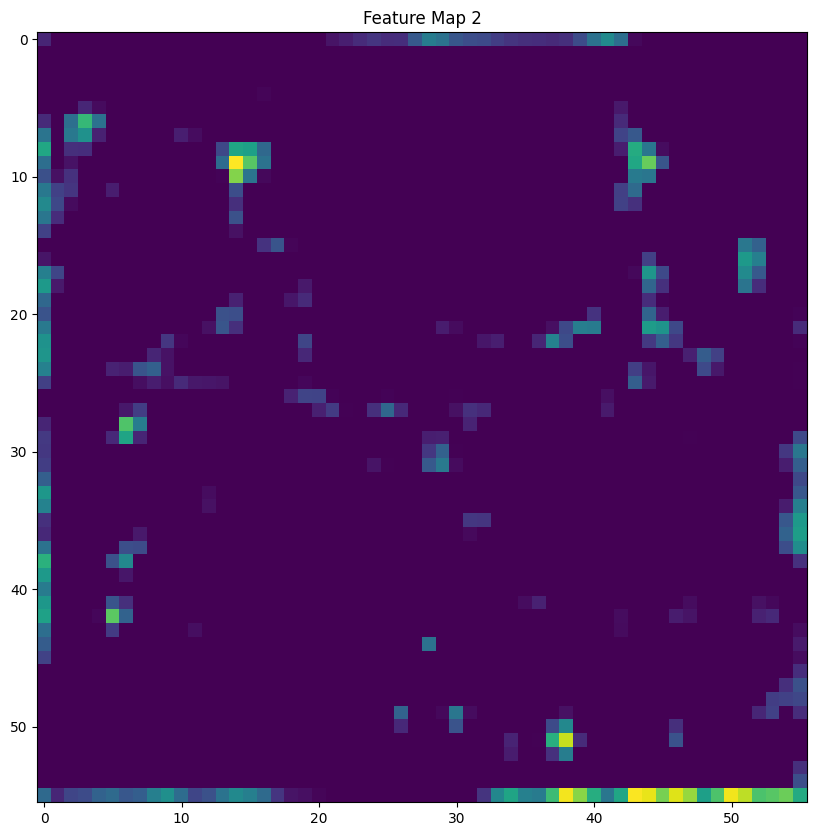

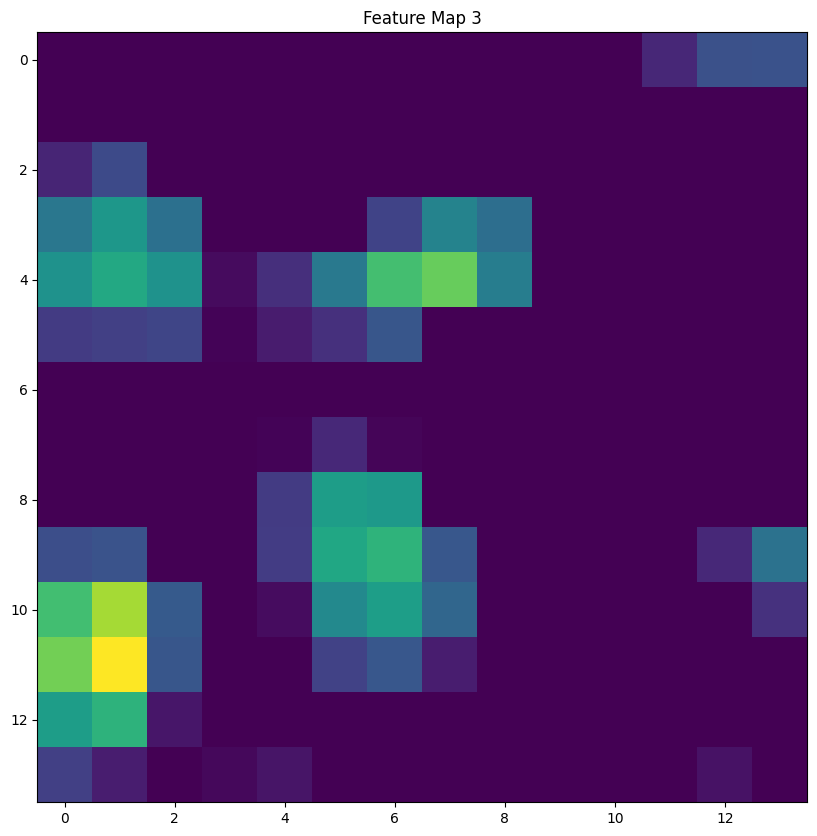


image 1/1 c:\COLLEGE 6TH SEM\DEEP_LEARNING\lab_assign_3\image_4.jpeg: 384x640 5 persons, 1 sports ball, 100.6ms
Speed: 2.5ms preprocess, 100.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[{'boxes': tensor([[1.9432e+02, 0.0000e+00, 2.7962e+02, 1.6634e+02],
        [3.6205e+00, 1.0510e-01, 7.9885e+01, 6.8980e+01],
        [4.4868e+01, 1.0564e+01, 1.7482e+02, 1.2474e+02],
        [1.1220e+02, 1.2250e+01, 2.2698e+02, 1.6683e+02],
        [1.2831e+02, 1.2176e+01, 1.8449e+02, 1.2145e+02],
        [1.9995e+02, 3.1171e+01, 2.1153e+02, 4.5016e+01],
        [1.6850e+02, 2.6668e+01, 1.8468e+02, 7.1248e+01],
        [1.3552e+02, 3.8022e+01, 1.5614e+02, 6.2475e+01],
        [1.2018e+02, 1.0681e+02, 1.7433e+02, 1.6650e+02],
        [6.9167e+01, 1.4863e+02, 9.5106e+01, 1.6731e+02],
        [1.7387e+02, 2.4749e+01, 1.8443e+02, 3.8163e+01],
        [1.1582e+02, 1.0082e+02, 1.4032e+02, 1.2467e+02],
        [1.1921e+02, 1.0669e+02, 1.7229e+02, 1.6257e+02],
        [1.1544e+02, 9.7

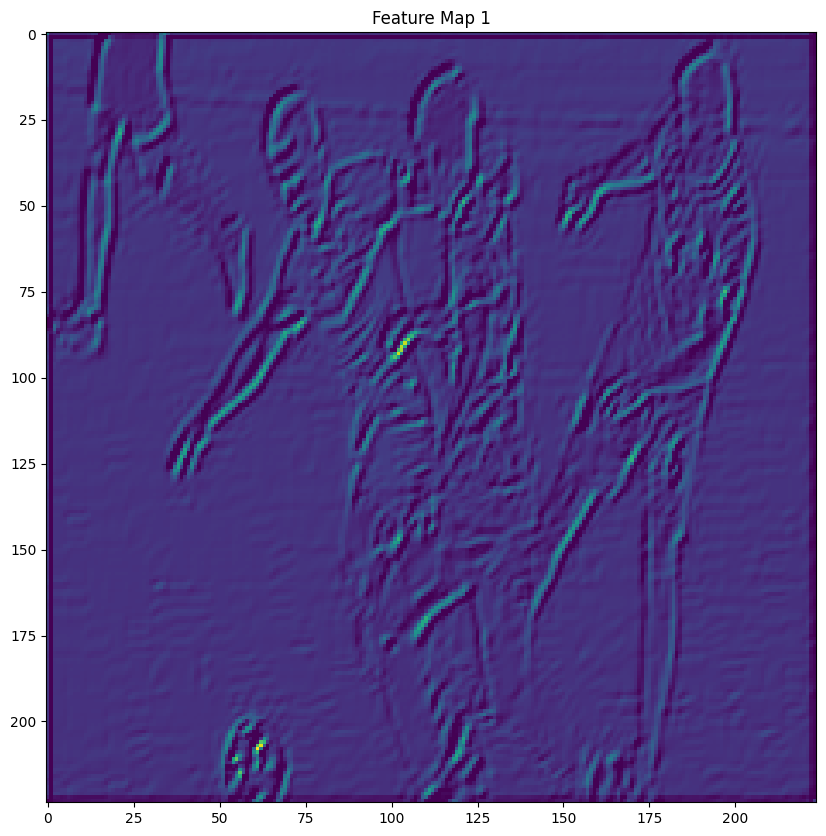

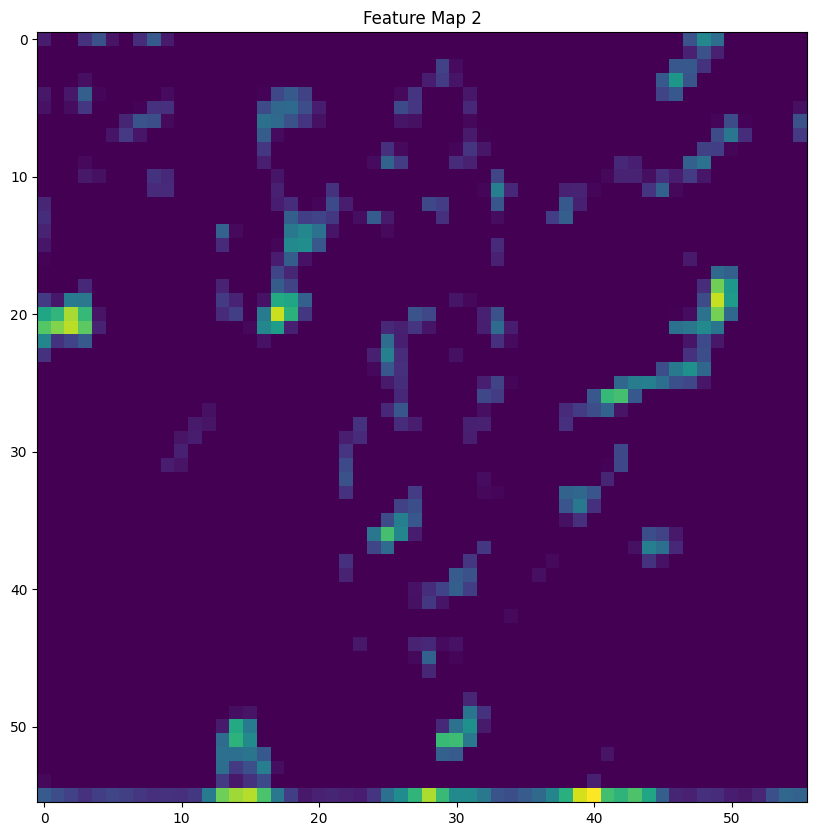

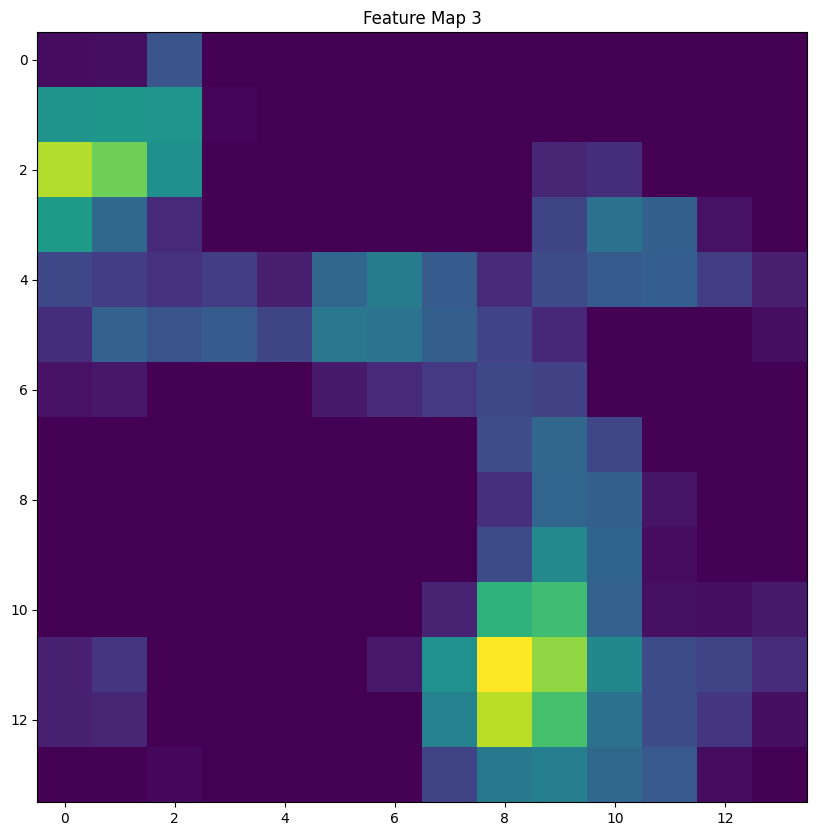

In [9]:
infer_yolov5("image_1.jpeg")
infer_faster_rcnn("image_1.jpeg")
extract_features("image_1.jpeg", model_name='VGG16')

infer_yolov5("image_2.jpeg")
infer_faster_rcnn("image_2.jpeg")
extract_features("image_2.jpeg", model_name='VGG16')

infer_yolov5("image_3.jpeg")
infer_faster_rcnn("image_3.jpeg")
extract_features("image_3.jpeg", model_name='VGG16')

infer_yolov5("image_4.jpeg")
infer_faster_rcnn("image_4.jpeg")
extract_features("image_4.jpeg", model_name='VGG16')

In [ ]:
infer_yolov5("image_5.jpeg")
infer_faster_rcnn("image_5.jpeg")
extract_features("image_5.jpeg", model_name='VGG16')

infer_yolov5("image_6.jpeg")
infer_faster_rcnn("image_6.jpeg")
extract_features("image_6.jpeg", model_name='VGG16')

infer_yolov5("image_7.jpeg")
infer_faster_rcnn("image_7.jpeg")
extract_features("image_7.jpeg", model_name='VGG16')

infer_yolov5("image_8.jpeg")
infer_faster_rcnn("image_8.jpeg")
extract_features("image_8.jpeg", model_name='VGG16')
